# Tutorial 3
## Outline
* Numba
* Neural network in matrix notation
* Back propagation
* Activation functions
* Q&A on HW#2


## Numba and Code Acceleration

Numba will pre-compile code so that it can be executed more efficiently.<br>
[Numba documentation](http://numba.pydata.org/numba-doc/latest/user/index.html)

In [1]:
import numba
import numpy as np


In [2]:
# @numba.jit(nopython=True)
def test():
    i=0
    for a in range(100000):
        i+=a
    return i

%timeit test()

5.13 ms ± 241 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
@numba.jit(nopython=True)
def test():
    i=0
    for a in range(100000):
        i+=a
    return i

%timeit test()

78.2 ns ± 3.67 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [6]:
@numba.jit(nopython=True)
def test():
    return np.sum(np.arange(1,100000))

%timeit test()

38.2 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Let's see how different it is for SGD that you work on in HW#1

In [10]:
import numpy.linalg as LA
import time
import warnings

warnings.filterwarnings("ignore")

@numba.jit()
def stochastic_gradient_descent(func,first_derivate,starting_point,stepsize,tol=1e-5,stochastic_injection=0):
    deriv=first_derivate(starting_point)
    count=0
    visited=[]
    while LA.norm(deriv)>tol and count<1e5:
        if stochastic_injection>0:
            random_vector=np.random.random(len(starting_point))*2-1
            stochastic_deriv=LA.norm(deriv)*random_vector/LA.norm(random_vector)
        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        new_point=starting_point+stepsize*(direction)

        if func(new_point)<func(starting_point):
            visited.append(starting_point)
            starting_point=new_point
            deriv=first_derivate(starting_point)
            stepsize*=1.2
            count+=1
            
        else:
            stepsize/=2
            count+=1
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited)}


def Rosenbrock(X):
    x,y=X
    return (1-x)**2+10*(y-x**2)**2

def Rosenbrock_grad(X):
    x,y=X
    dx=2*(x-1)+20*(y-x**2)*(-2*x)
    dy=20*(y-x**2)
    return np.array([dx,dy])

original_point=np.array([-0.5,1.5])
%timeit stochastic_gradient_descent(Rosenbrock,Rosenbrock_grad,original_point,0.1,1e-5,1)

89.7 ms ± 5.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Neural network in matrix notation
![Neural network](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/example_network.svg) <br>




### Back propagation formula
The four equations for doing back propagation:
$$\begin{eqnarray}\delta^L&=&\nabla_aC\odot\sigma'(z^L) \\
\delta^l&=&((w^{l+1})^T\delta^{l+1})\odot\sigma'(z^l) \\ \frac{\partial C}{\partial b_j^l}&=&\delta_j^l \\
\frac{\partial C}{\partial w_{jk}^l}&=&a_k^{l-1}\delta_j^l
\end{eqnarray}$$

Credit: [Neural Networks and Deep Learning, Ch. 2](http://neuralnetworksanddeeplearning.com/chap2.html)

## Activation functions
### Linear
$y=x$
<br>$y'=1$ <br>

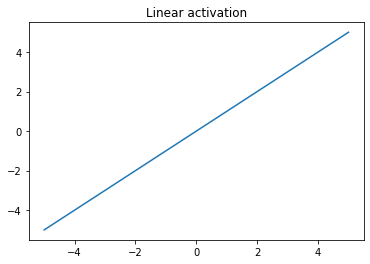

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
x=np.linspace(-5,5,2000)
y=x
plt.plot(x,y)
plt.title("Linear activation");

### tanh
$y=\tanh(x)$
<br>$y\in(-1,1)$
<br>$y'=1-y^2$



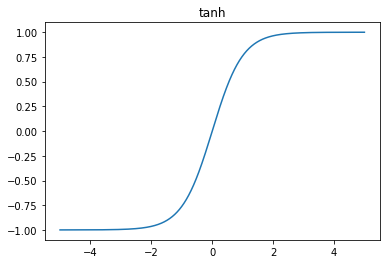

In [12]:
x=np.linspace(-5,5,2000)
y=np.tanh(x)
plt.plot(x,y)
plt.title("tanh");

### sigmoid
$y={\displaystyle \frac{1}{1+e^{-x}} }$
<br><br>$y\in(0,1)$
<br>$y'=y(1-y)$<br>

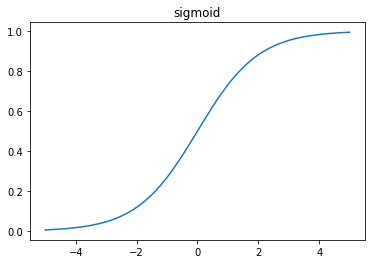

In [13]:
x=np.linspace(-5,5,2000)
y=1/(1+np.exp(-x))
plt.plot(x,y)
plt.title("sigmoid");

### ReLU
$y={\displaystyle \begin{equation}
\begin{cases} &x \:\:\: x\geqslant0 \\
& 0 \:\:\: x<0
\end{cases}
\end{equation}}$
<br><br>$y\in[0,\infty)$
<br><br>$y'=\begin{equation}
\begin{cases}
& 1\:\:\: x\geqslant0 \\
& 0\:\:\: x<0
\end{cases}
\end{equation}$


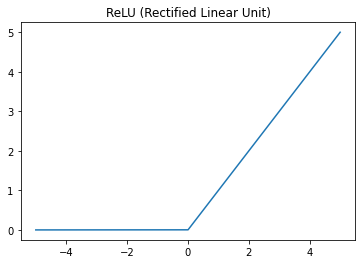

In [14]:
x=np.linspace(-5,5,2000)
y=x*(x>=0)
plt.plot(x,y)
plt.title("ReLU (Rectified Linear Unit)");

### softmax
$y_i=f_i(\vec{x})={\displaystyle \frac{e^{x_i}}{\sum_{j=1}^J e^{x_j}}}$
<br>$y_i\in[0,1]$
<br><br>${\displaystyle \frac{\partial y_i}{\partial x_j}=y_i(\delta_{ij}-y_j)}$


### Many more activation functions
[Check here](https://en.wikipedia.org/wiki/Activation_function)

## Some useful materials for better understanding NN
[Neural Networks, Manifolds, and Topology - Colah's blog](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/)<br>
[How the backpropagation algorithm works - Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap2.html
)